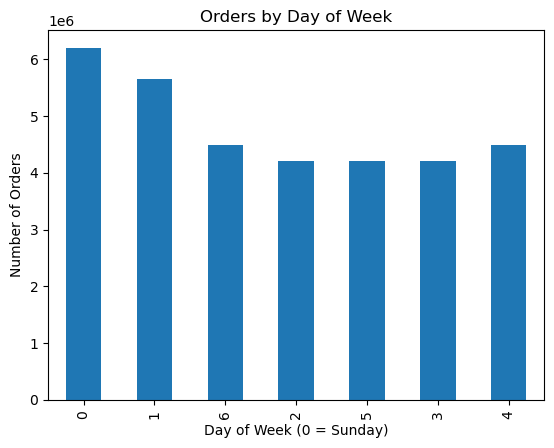

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', '_merge', 'product_name', 'aisle_id',
       'department_id', 'prices', 'max_order', 'loyalty_flag',
       'order_frequency_flag'],
      dtype='object')

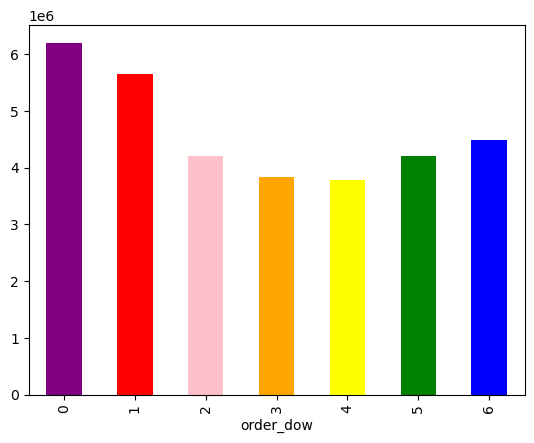

In [35]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Load the final merged DataFrame from the pickle file (no extension)
ords_prods_merge_final = pd.read_pickle('/Users/am/Desktop/CF Data Analysis essentials /2_Data Analytics Immersions_2 von 3/4 Phyton/4.8/ords_prods_merge_final_4.8new.pkl')

# Plot bar chart of orders by day of the week
ords_prods_merge_final['order_dow'].value_counts().sort_index().plot.bar()
bar = ords_prods_merge_final['order_dow'].value_counts().plot.bar()

plt.xlabel('Day of Week (0 = Sunday)')
plt.ylabel('Number of Orders')
plt.title('Orders by Day of Week')
plt.show()

# Plot bar chart and assign it to 'bar'
bar = ords_prods_merge_final['order_dow'].value_counts().sort_index().plot.bar(
    color=['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue']
)
ords_prods_merge_final.columns


In [36]:
print(ords_prods_merge_final.head())


   order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0   2539329        1    prior             1          2                  8   
1   2398795        1    prior             2          3                  7   
2    473747        1    prior             3          3                 12   
3   2254736        1    prior             4          4                  7   
4    431534        1    prior             5          4                 15   

   days_since_prior_order  product_id  add_to_cart_order  reordered _merge  \
0                     NaN         196                  1          0   both   
1                    15.0         196                  1          1   both   
2                    21.0         196                  1          1   both   
3                    29.0         196                  1          1   both   
4                    28.0         196                  1          1   both   

  product_name  aisle_id  department_id  prices  max_order  loyalty_

In [37]:
# folder for saving
save_folder = '/Users/am/Desktop/CF Data Analysis essentials /2_Data Analytics Immersions_2 von 3/4 Phyton/4.9'

# Saving file 
bar.figure.savefig(os.path.join(save_folder, 'bar_orders_dow.png'))


<Axes: ylabel='Frequency'>

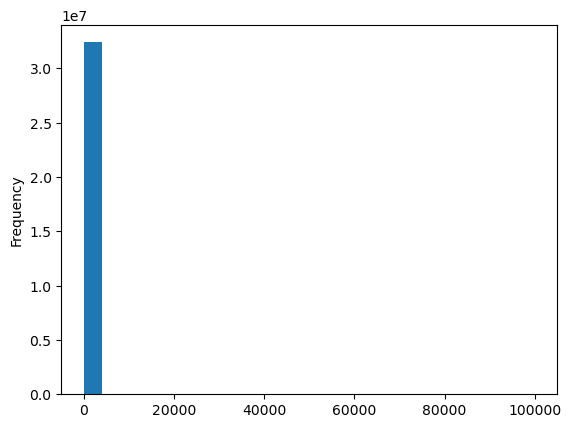

In [38]:
ords_prods_merge_final['prices'].plot.hist(bins = 25)


In [39]:
ords_prods_merge_final['prices'].describe()



count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [40]:
ords_prods_merge_final['prices'].mean()



11.980225638383454

In [41]:
ords_prods_merge_final['prices'].median()


7.4

In [42]:
ords_prods_merge_final['prices'].max()


99999.0

<Axes: xlabel='prices', ylabel='prices'>

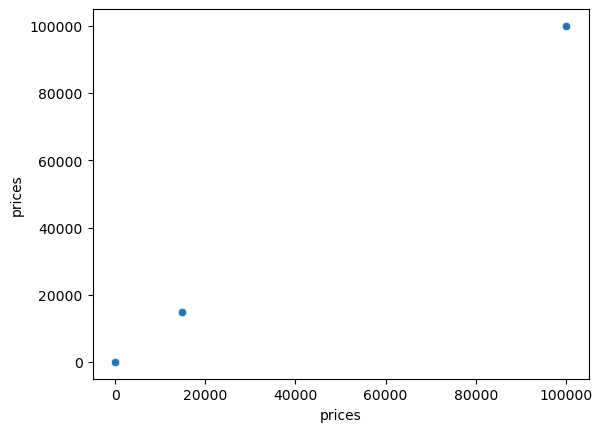

In [43]:
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge_final)


In [44]:
ords_prods_merge_final.loc[ords_prods_merge_final['prices'] > 100]


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,max_order,loyalty_flag,order_frequency_flag
10030345,912404,17,prior,12,2,14,5.0,21553,5,0,both,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,40,Regular customer,Frequent customer
10030346,603376,17,prior,22,6,16,4.0,21553,3,1,both,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,40,Regular customer,Frequent customer
10030347,3264360,135,prior,2,2,21,13.0,21553,6,0,both,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,4,New customer,Regular customer
10030348,892534,135,prior,3,0,8,12.0,21553,3,1,both,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,4,New customer,Regular customer
10030349,229704,342,prior,8,1,19,30.0,21553,9,0,both,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,16,Regular customer,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,2249946,204099,prior,29,0,8,4.0,33664,1,0,both,2 % Reduced Fat Milk,84,16,99999.0,39,Regular customer,Frequent customer
29166210,2363282,204099,prior,31,0,9,2.0,33664,1,1,both,2 % Reduced Fat Milk,84,16,99999.0,39,Regular customer,Frequent customer
29166211,3181945,204395,prior,13,3,15,8.0,33664,25,0,both,2 % Reduced Fat Milk,84,16,99999.0,15,Regular customer,Frequent customer
29166212,2486215,205227,prior,7,3,20,4.0,33664,8,0,both,2 % Reduced Fat Milk,84,16,99999.0,12,Regular customer,Regular customer


In [45]:
ords_prods_merge_final.loc[ords_prods_merge_final['prices'] >100, 'prices'] = np.nan
ords_prods_merge_final['prices'].max()

25.0

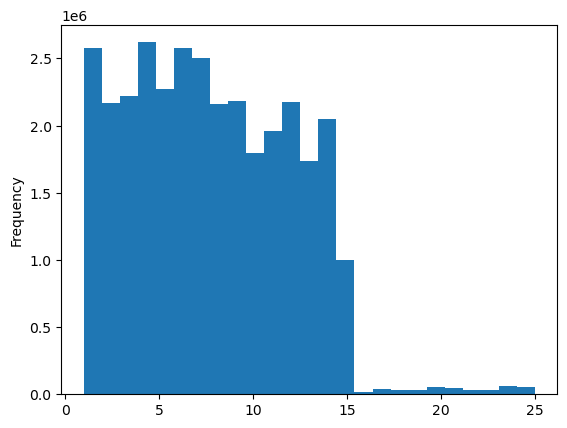

In [46]:
#histograms
hist= ords_prods_merge_final['prices'].plot.hist(bins=25)

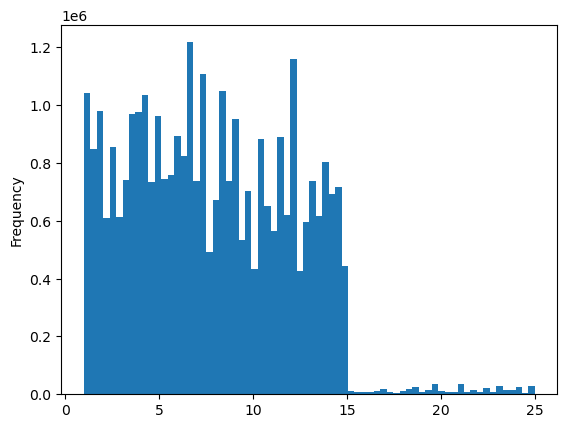

In [47]:
#histograms better
hist= ords_prods_merge_final['prices'].plot.hist(bins=70)

In [48]:
#line charts
df = ords_prods_merge_final[:2000000]


Big sample rows: 22683761
Small sample rows: 9721098
Total rows: 32404859


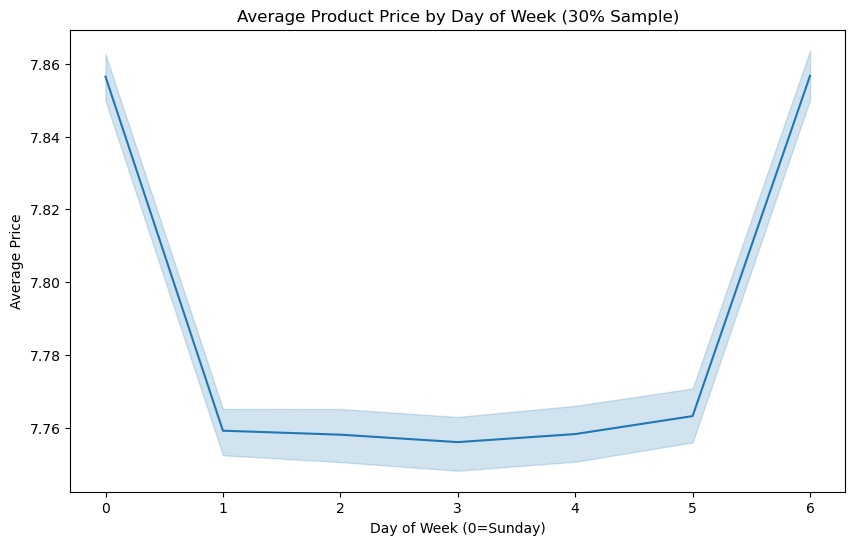

In [49]:
# Set seed for reproducibility
np.random.seed(4)

# Create boolean mask for 70% split
dev = np.random.rand(len(ords_prods_merge_final)) <= 0.7

# Split dataframe into big (70%) and small (30%) samples
big = ords_prods_merge_final[dev]
small = ords_prods_merge_final[~dev]

# Check sizes to verify split (optional)
print(f"Big sample rows: {len(big)}")
print(f"Small sample rows: {len(small)}")
print(f"Total rows: {len(big) + len(small)}")

# Create subset dataframe with only the needed columns
df_2 = small[['order_dow', 'prices']]

# Plot line chart: average prices by day of week
plt.figure(figsize=(10,6))
line = sns.lineplot(data=df_2, x='order_dow', y='prices', estimator='mean')

plt.xlabel('Day of Week (0=Sunday)')
plt.ylabel('Average Price')
plt.title('Average Product Price by Day of Week (30% Sample)')
plt.show()

In [53]:
# save path
path = '/Users/am/Desktop/CF Data Analysis essentials /2_Data Analytics Immersions_2 von 3/4 Phyton/4.9'

# Save current DataFrame
ords_prods_merge_final.to_pickle(os.path.join(path, 'ords_prods_merge_final_491Intro.pkl'))

In [54]:
test_df = pd.read_pickle(os.path.join(path, 'ords_prods_merge_final_491Intro.pkl'))
print(test_df.shape)
test_df.head()

(32404859, 18)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,max_order,loyalty_flag,order_frequency_flag
0,2539329,1,prior,1,2,8,NaN,196,1,0,both,Soda,77,7,9.0,10,New customer,Non-frequent customer
1,2398795,1,prior,2,3,7,15.0,196,1,1,both,Soda,77,7,9.0,10,New customer,Non-frequent customer
2,473747,1,prior,3,3,12,21.0,196,1,1,both,Soda,77,7,9.0,10,New customer,Non-frequent customer
3,2254736,1,prior,4,4,7,29.0,196,1,1,both,Soda,77,7,9.0,10,New customer,Non-frequent customer
4,431534,1,prior,5,4,15,28.0,196,1,1,both,Soda,77,7,9.0,10,New customer,Non-frequent customer
